In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_curve
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("phishing website dataset.csv")

In [4]:
df = data.copy()

In [5]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [7]:
df.duplicated().sum()

5206

In [8]:
df["Result"].value_counts()

Result
 1    6157
-1    4898
Name: count, dtype: int64

In [9]:
df[~(df.duplicated())]["Result"].value_counts()

Result
-1    3019
 1    2830
Name: count, dtype: int64

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.reset_index(drop=True, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5849 entries, 0 to 5848
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            5849 non-null   int64
 1   URL_Length                   5849 non-null   int64
 2   Shortining_Service           5849 non-null   int64
 3   having_At_Symbol             5849 non-null   int64
 4   double_slash_redirecting     5849 non-null   int64
 5   Prefix_Suffix                5849 non-null   int64
 6   having_Sub_Domain            5849 non-null   int64
 7   SSLfinal_State               5849 non-null   int64
 8   Domain_registeration_length  5849 non-null   int64
 9   Favicon                      5849 non-null   int64
 10  port                         5849 non-null   int64
 11  HTTPS_token                  5849 non-null   int64
 12  Request_URL                  5849 non-null   int64
 13  URL_of_Anchor                5849 non-null   int

In [13]:
df.corr()["Result"]

having_IP_Address              0.104952
URL_Length                     0.058228
Shortining_Service            -0.076166
having_At_Symbol               0.034757
double_slash_redirecting      -0.036693
Prefix_Suffix                  0.381134
having_Sub_Domain              0.296214
SSLfinal_State                 0.693228
Domain_registeration_length   -0.218623
Favicon                       -0.025457
port                           0.014201
HTTPS_token                   -0.051412
Request_URL                    0.237778
URL_of_Anchor                  0.679125
Links_in_tags                  0.243864
SFH                            0.281131
Submitting_to_email           -0.008014
Abnormal_URL                  -0.090043
Redirect                      -0.037462
on_mouseover                   0.012790
RightClick                     0.009286
popUpWidnow                   -0.022455
Iframe                        -0.011756
age_of_domain                  0.062800
DNSRecord                      0.033204


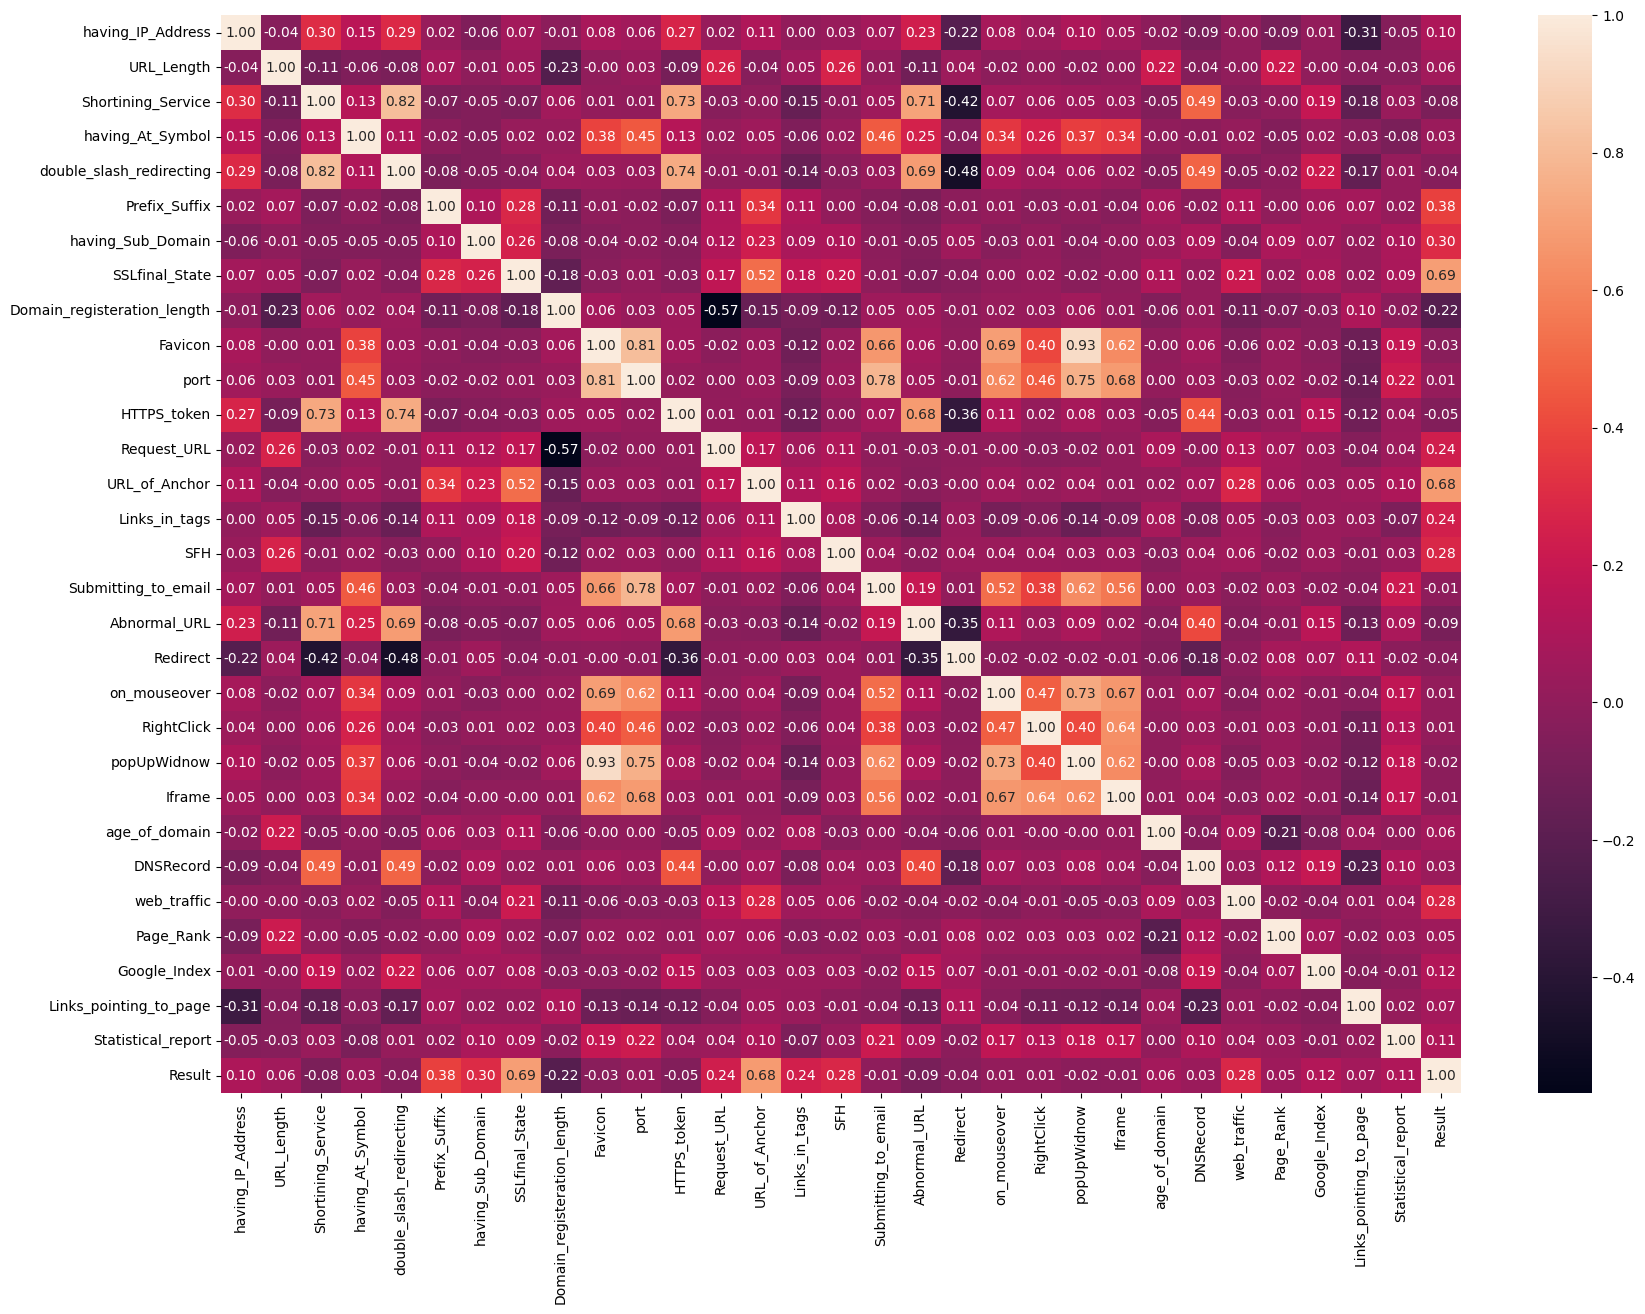

In [14]:
plt.figure(figsize=(20, 14))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [15]:
X = df.drop("Result", axis=1)
y = df["Result"]

In [16]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.75, random_state=33)

In [17]:
models = [DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(),
         LogisticRegression(), KNeighborsClassifier(), BernoulliNB()]

In [18]:
for i in models:
    m = i
    m.fit(X_tr, y_tr)
    tr_acc = m.score(X_tr, y_tr)
    pred = m.predict(X_te)
    te_acc = accuracy_score(y_te, pred)
    print(f"Model : {i}")
    print("Training Accuracy :", tr_acc)
    print("Testing Accuracy :", te_acc)

Model : DecisionTreeClassifier()
Training Accuracy : 0.9901960784313726
Testing Accuracy : 0.9316473000683527
Model : RandomForestClassifier()
Training Accuracy : 0.9901960784313726
Testing Accuracy : 0.948051948051948
Model : AdaBoostClassifier()
Training Accuracy : 0.9384404924760602
Testing Accuracy : 0.9302802460697197
Model : LogisticRegression()
Training Accuracy : 0.9240766073871409
Testing Accuracy : 0.9138755980861244
Model : KNeighborsClassifier()
Training Accuracy : 0.9525763793889649
Testing Accuracy : 0.9056732740943267
Model : BernoulliNB()
Training Accuracy : 0.8985408116735066
Testing Accuracy : 0.8947368421052632


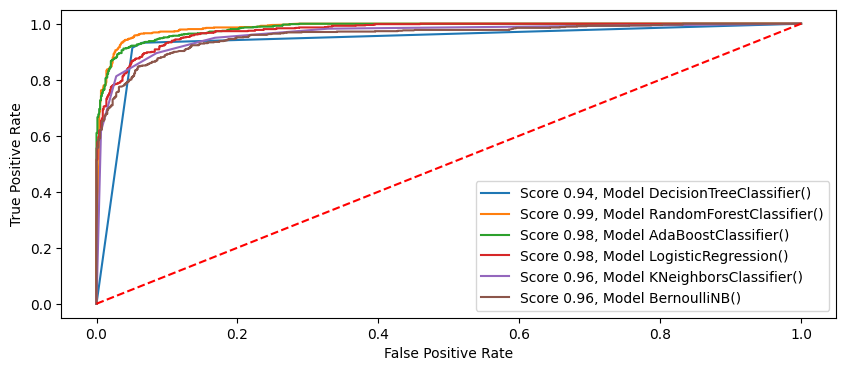

In [19]:
plt.figure(figsize=(10, 4))
for i in models:
    m = i
    m.fit(X_tr, y_tr)
    tr_acc = m.score(X_tr, y_tr)
    pred_prob = m.predict_proba(X_te)[:,1]
    fpr, tpr, th = roc_curve(y_te, pred_prob)
    auc_score = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"Score {np.round(auc_score, 2)}, Model {i}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0,1], color="red", ls="--")
plt.legend()
plt.show()

In [29]:
parameters = {
    "n_estimators":[50, 100, 150, 200],
    "criterion": ['gini',"entropy"],
    "max_depth":[10, 12, 14],
    "max_features": ['sqrt', "log2", 20, 24, 28]
}

In [30]:
gscv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters,
                   n_jobs=-1, cv=5, verbose=True, scoring="accuracy")

In [31]:
gscv.fit(X_tr, y_tr)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 14],
                         'max_features': ['sqrt', 'log2', 20, 24, 28],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=True)

In [32]:
gscv.best_score_

0.9518925826552002

In [33]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 14,
 'max_features': 'log2',
 'n_estimators': 200}

In [34]:
y_pr = gscv.best_estimator_.predict(X_te)

In [35]:
accuracy_score(y_te, y_pr)

0.948051948051948

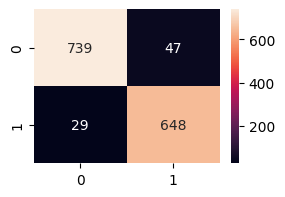

In [37]:
plt.figure(figsize=(3, 2))
sns.heatmap(confusion_matrix(y_te, y_pr), annot=True, fmt="d")
plt.show()

In [38]:
print(classification_report(y_te, y_pr))

              precision    recall  f1-score   support

          -1       0.96      0.94      0.95       786
           1       0.93      0.96      0.94       677

    accuracy                           0.95      1463
   macro avg       0.95      0.95      0.95      1463
weighted avg       0.95      0.95      0.95      1463



In [42]:
import re

In [73]:
new_data = []

url = "http://125.98.3.123/fake.html"
find_ip = re.findall("\d+", url)

if len(find_ip)>=4:
    new_data.append(1)
else:
    new_data.append(-1)

if len(url) < 54:
    new_data.append(-1)
elif 54 < len(url) < 75:
    new_data.append(0)
else:
    new_data.append(1)

if "tinyurl" in url or "bit.ly" in url:
    new_data.append(1)
else:
    new_data.append(-1)

In [74]:
new_data

[1, -1, -1]